In [1]:
import numpy as np
import warnings
import pandas as pd
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA



warnings.filterwarnings('ignore')


In [2]:
articles = pd.read_csv('sample_articles.csv')

In [3]:
articles = articles[['text', 'source', 'group', 'date', 'intervention', 'expanding', 'distancing', 'assimilating']]
articles['date'] =  pd.to_datetime(articles['date'], format='%Y%m%d')
articles

,text,source,group,date,intervention,expanding,distancing,assimilating
0,"Third Rate Or Not, No Meddling Please! By UPEN...",News India - Times,Indian,1997-10-24,post,0.0,1.0,0.0
1,Phagwah Parade Draws Many By DHARMVIR GEHLAUT ...,News India - Times,Indian,2001-03-23,post,NaN,NaN,NaN
2,"Advani Blames Congress And UF DALTONGUNJ, Biha...",News India - Times,Indian,1998-01-23,post,NaN,NaN,NaN
3,Violence Feared During Assembly Elections By N...,News India - Times,Indian,2001-01-05,post,NaN,NaN,NaN
4,Indrani Rahman's Final Bow By ARUN A. AGUIAR P...,News India - Times,Indian,1999-02-19,post,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1010,President Bush offers Ramadan greeting Preside...,The Arab American View,Arab,2001-12-15,pre,1.0,0.0,0.0
1011,"US officials vow to fight bigotry ""We are list...",The Arab American View,Arab,2001-11-05,pre,1.0,0.0,0.0
1012,Al-Jazeera Bureau Chief Hafez Mirazi will be t...,The Arab American View,Arab,2002-02-15,pre,1.0,0.0,0.0
1013,There are literally thousands of Arab American...,The Arab American View,Arab,2002-04-28,pre,1.0,0.0,1.0


In [4]:
#adding column determining if NA or not
list = []
for x in articles['assimilating'].isnull().values:
    if x == True:
        list.append(0)
    else:
        list.append(1)

articles['category'] = list
articles

,text,source,group,date,intervention,expanding,distancing,assimilating,category
0,"Third Rate Or Not, No Meddling Please! By UPEN...",News India - Times,Indian,1997-10-24,post,0.0,1.0,0.0,1
1,Phagwah Parade Draws Many By DHARMVIR GEHLAUT ...,News India - Times,Indian,2001-03-23,post,NaN,NaN,NaN,0
2,"Advani Blames Congress And UF DALTONGUNJ, Biha...",News India - Times,Indian,1998-01-23,post,NaN,NaN,NaN,0
3,Violence Feared During Assembly Elections By N...,News India - Times,Indian,2001-01-05,post,NaN,NaN,NaN,0
4,Indrani Rahman's Final Bow By ARUN A. AGUIAR P...,News India - Times,Indian,1999-02-19,post,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
1010,President Bush offers Ramadan greeting Preside...,The Arab American View,Arab,2001-12-15,pre,1.0,0.0,0.0,1
1011,"US officials vow to fight bigotry ""We are list...",The Arab American View,Arab,2001-11-05,pre,1.0,0.0,0.0,1
1012,Al-Jazeera Bureau Chief Hafez Mirazi will be t...,The Arab American View,Arab,2002-02-15,pre,1.0,0.0,0.0,1
1013,There are literally thousands of Arab American...,The Arab American View,Arab,2002-04-28,pre,1.0,0.0,1.0,1


In [5]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(articles, test_size=0.1, random_state=42)

In [6]:
#cleaning the data, removing html, punctuation, and /n's, removing stopwords
import re
import string
!pip install nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

train['text'] = train['text'].str.lower()
val['text'] = val['text'].str.lower()
#training, validation = train_test_split(original_training_data, test_size=0.1, random_state=42)

compiling = re.compile(r'<[^>]+>')
                       
def remove_html(x):
    return compiling.sub('', x)
def remove_punctuation(x):
    return x.translate(str.maketrans('','', string.punctuation))
def remove_n(x):
    return x.replace('\n', '')
removal_words = stopwords.words('english')

#cleaning train 
train['text'] = train.agg({"text": [remove_html]})
train['text'] = train.agg({'text': [remove_punctuation]})
train['text'] = train.agg({'text': [remove_n]})
train['text'] = train['text'].apply(lambda x: " ".join([y for y in x.split() if y not in removal_words]))
#cleaning test
val['text'] = val.agg({"text": [remove_html]})
val['text'] = val.agg({'text': [remove_punctuation]})
val['text'] = val.agg({'text': [remove_n]})
val['text'] = val['text'].apply(lambda x: " ".join([y for y in x.split() if y not in removal_words ]))

/bin/sh: pip: command not found


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viv360/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
#count words in NA and not NA
from collections import Counter
NA_count = Counter(" ".join(train[train['category'] == 0]['text']).split())
not_NA_count = Counter(" ".join(train[train['category'] == 1]['text']).split())

testing = pd.DataFrame({"NA": NA_count, "Not NA": not_NA_count}).fillna(0)
testing

,NA,Not NA
put,113.0,126.0
intellectual,11.0,20.0
perversity,1.0,0.0
like,431.0,493.0
whenever,12.0,17.0
...,...,...
kalifatul,0.0,1.0
twostorey,0.0,1.0
spires,0.0,2.0
onestorey,0.0,1.0


In [8]:
#make column of times NA appeared more than not NA
testing['NA distinct'] = testing['NA'] - testing['Not NA']
testing = testing.sort_values(by = 'NA distinct', ascending = False)
testing['NA percent'] = testing['NA'] / testing['Not NA']
tester = testing[testing['Not NA'] > 0].sort_values(by = 'NA percent', ascending = False)

#tester[tester['NA'] > 100].sort_values(by = 'NA percent', ascending = False)
#list of the top 100 words
words = tester[tester['NA'] > 100].sort_values(by = 'NA distinct', ascending = False).head(300).reset_index()['index'].values.astype(str)
words

array(['party', 'bjp', 'congress', 'minister', 'film', 'gandhi',
       'israeli', 'chief', 'says', 'films', 'sharif', 'leader', 'seats',
       'election', 'government', 'temple', 'army', 'delhi', 'prime',
       'former', 'janata', 'parties', 'may', 'alliance', 'jerusalem',
       'set', 'soldiers', 'palestinian', 'palestinians', 'front', 'power',
       'khan', 'old', 'nuclear', 'land', 'vajpayee', 'home', 'site',
       'left', 'five', 'hindu', 'forces', 'indias', 'form', 'jewish',
       'elections', 'months', 'west', 'gujarat', 'away', 'coalition',
       'majority', 'mother', 'asia', 'situation', 'governments',
       'opposition', 'christians', 'mosque', 'yet', 'man', 'four',
       'though', 'music', 'making', 'next', 'lebanon', 'back', 'better',
       'lot', 'little', 'visit', 'court', 'despite', 'far', '10',
       'movement', 'came', 'killed', 'military', 'went', 'give',
       'conference', 'within', 'known', 'british', 'past', 'took',
       'family', 'christian', 'still

In [9]:
cv = CountVectorizer(vocabulary=words, ngram_range = (1, 2))

ohc_words_x_train = pd.SparseDataFrame(cv.fit_transform(train['text']), 
                       train.index,
                       cv.get_feature_names(), 
                       default_fill_value=0)
ohc_words_x_train

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,states,world,people,muslims,muslim,community,us,arab,said,american
883,0,5,0,0,0,0,0,0,0,0,...,0,0,0,4,5,0,0,0,2,0
589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2,0,1,0,1
88,0,0,0,0,0,0,0,0,0,0,...,0,1,5,0,1,0,1,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,1,2,0,18,0
886,0,0,0,0,0,0,1,0,5,0,...,0,3,2,4,3,2,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,3,22,0,0,2,0,0,...,0,0,1,3,5,1,0,0,13,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,4,0,0,0,2
860,0,0,0,1,0,0,0,0,0,0,...,7,2,1,0,2,0,13,0,2,6
435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,1,1


In [10]:
features_x_train = pd.concat([pd.get_dummies(train[col]) for col in ['source', 'intervention', 'group']], axis=1)
features_x_train = features_x_train.drop(columns = ["The Arab American View"])
features_x_train

,India - West,India Abroad,News India - Times,The Arab American News,post,pre,Arab,Indian
883,0,1,0,0,0,1,0,1
589,0,0,0,1,0,1,1,0
88,0,0,1,0,1,0,0,1
63,0,0,1,0,1,0,0,1
886,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
106,0,0,1,0,1,0,0,1
270,0,0,0,1,1,0,1,0
860,0,1,0,0,0,1,0,1
435,1,0,0,0,1,0,0,1


In [11]:
xx_train = pd.merge(left=ohc_words_x_train, left_index=True
                  ,right=features_x_train, right_index=True,
                  how='inner')
xx_train

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,said,american,India - West,India Abroad,News India - Times,The Arab American News,post,pre,Arab,Indian
883,0,5,0,0,0,0,0,0,0,0,...,2,0,0,1,0,0,0,1,0,1
589,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
63,0,0,0,0,0,0,0,0,0,0,...,18,0,0,0,1,0,1,0,0,1
886,0,0,0,0,0,0,1,0,5,0,...,0,2,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,0,3,22,0,0,2,0,0,...,13,0,0,0,1,0,1,0,0,1
270,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,1,1,0,1,0
860,0,0,0,1,0,0,0,0,0,0,...,2,6,0,1,0,0,0,1,0,1
435,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,1


In [12]:
yy_train = train['category']
NA_model = LogisticRegressionCV(fit_intercept = True, penalty = 'l1', solver = 'saga')
NA_model.fit(xx_train, yy_train)

accuracy = NA_model.score(xx_train, yy_train)
print("Training Accuracy: ", accuracy)

Training Accuracy:  0.791894852135816


In [13]:
cv = CountVectorizer(vocabulary=words, ngram_range = (1, 2))

ohc_words_x_test = pd.SparseDataFrame(cv.fit_transform(val['text']), 
                       val.index,
                       cv.get_feature_names(), 
                       default_fill_value=0)
ohc_words_x_test

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,states,world,people,muslims,muslim,community,us,arab,said,american
752,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,2,1,0,4,0
519,0,0,0,1,0,0,1,0,0,0,...,0,10,2,3,15,1,1,7,0,1
210,4,0,2,1,0,0,0,1,0,0,...,4,0,2,0,1,0,1,0,0,0
611,1,0,0,0,0,0,0,0,0,0,...,1,0,15,0,1,5,8,0,11,5
914,0,0,0,1,0,0,2,0,2,0,...,1,0,1,6,7,2,10,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0,0,0,0,20,0,0,0,0,0,...,0,0,4,1,0,1,0,2,6,1
554,0,0,1,1,0,0,3,0,0,0,...,9,13,0,0,1,0,2,15,0,10
798,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,2,0,0,4,1
244,1,0,21,0,0,0,7,0,0,0,...,6,1,0,0,1,0,33,5,1,1


In [14]:
features_x_test = pd.concat([pd.get_dummies(val[col]) for col in ['source', 'intervention', 'group']], axis=1)
features_x_test = features_x_test.drop(columns = ["The Arab American View"])
features_x_test

,India - West,India Abroad,News India - Times,The Arab American News,post,pre,Arab,Indian
752,1,0,0,0,0,1,0,1
519,0,0,0,1,0,1,1,0
210,0,1,0,0,1,0,0,1
611,0,0,1,0,0,1,0,1
914,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
542,0,0,0,1,0,1,1,0
554,0,0,0,1,0,1,1,0
798,1,0,0,0,0,1,0,1
244,0,0,0,1,1,0,1,0


In [15]:
xx_test = pd.merge(left=ohc_words_x_test, left_index=True
                  ,right=features_x_test, right_index=True,
                  how='inner')
xx_test

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,said,american,India - West,India Abroad,News India - Times,The Arab American News,post,pre,Arab,Indian
752,0,0,0,0,0,0,0,0,0,0,...,4,0,1,0,0,0,0,1,0,1
519,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
210,4,0,2,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
611,1,0,0,0,0,0,0,0,0,0,...,11,5,0,0,1,0,0,1,0,1
914,0,0,0,1,0,0,2,0,2,0,...,0,3,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0,0,0,0,20,0,0,0,0,0,...,6,1,0,0,0,1,0,1,1,0
554,0,0,1,1,0,0,3,0,0,0,...,0,10,0,0,0,1,0,1,1,0
798,0,0,0,0,0,0,0,0,0,0,...,4,1,1,0,0,0,0,1,0,1
244,1,0,21,0,0,0,7,0,0,0,...,1,1,0,0,0,1,1,0,1,0


In [16]:
accuracy = NA_model.score(xx_test, val['category'])
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.7450980392156863


In [17]:
unlabeled_articles = pd.read_csv('unlabeled_articles.csv', index_col=0)
unlabeled_articles['date'] =  pd.to_datetime(unlabeled_articles['date'], format='%Y%m%d')
unlabeled_articles

,text,source,date,intervention
1,Bleak Fate Of Women's Reservation Bill By SOU...,News India - Times,1998-07-24,post
2,Pak Christians Protest Blasphemy Law By Our S...,News India - Times,1998-07-24,post
3,Women's bill likely to be abandoned again ...,India Abroad,1998-07-24,post
4,Kashmir's Karma: An Analysis By HARI C. POLAV...,News India - Times,1998-07-17,post
5,Exiled Writer Can't See Her Dying Mother WASH...,News India - Times,1998-07-17,post
...,...,...,...,...
4665,Stage set for Bhutto's arrest in corruption...,India Abroad,1998-07-31,post
4666,Women's reservation bill is a setback to fe...,India Abroad,1998-07-31,post
4667,Study finds anti-Muslim incidents increasin...,India Abroad,1998-07-31,post
4668,Congressional Viewpoint: U.S. seen as coddl...,India Abroad,1998-07-31,post


In [18]:
list = []
for x in unlabeled_articles['source']:
    if x == "The Arab American News":
        list.append("Arab")
    else:
        list.append("Indian")

unlabeled_articles['group'] = list
unlabeled_articles

,text,source,date,intervention,group
1,Bleak Fate Of Women's Reservation Bill By SOU...,News India - Times,1998-07-24,post,Indian
2,Pak Christians Protest Blasphemy Law By Our S...,News India - Times,1998-07-24,post,Indian
3,Women's bill likely to be abandoned again ...,India Abroad,1998-07-24,post,Indian
4,Kashmir's Karma: An Analysis By HARI C. POLAV...,News India - Times,1998-07-17,post,Indian
5,Exiled Writer Can't See Her Dying Mother WASH...,News India - Times,1998-07-17,post,Indian
...,...,...,...,...,...
4665,Stage set for Bhutto's arrest in corruption...,India Abroad,1998-07-31,post,Indian
4666,Women's reservation bill is a setback to fe...,India Abroad,1998-07-31,post,Indian
4667,Study finds anti-Muslim incidents increasin...,India Abroad,1998-07-31,post,Indian
4668,Congressional Viewpoint: U.S. seen as coddl...,India Abroad,1998-07-31,post,Indian


In [19]:
cv = CountVectorizer(vocabulary=words, ngram_range = (1, 2))

ohc_words_x_unlabeled = pd.SparseDataFrame(cv.fit_transform(unlabeled_articles['text']), 
                       unlabeled_articles.index,
                       cv.get_feature_names(), 
                       default_fill_value=0)
ohc_words_x_unlabeled

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,states,world,people,muslims,muslim,community,us,arab,said,american
1,9,6,7,0,0,1,0,2,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,17,6,5,5,0,2,0,0,0,0,...,1,0,0,0,1,0,0,0,5,0
4,0,0,0,1,0,0,0,0,0,0,...,13,0,3,2,4,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,2,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,2,0,0,2,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,9,0
4666,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,3,0,1,0,0,0
4667,0,0,0,0,0,0,0,0,1,0,...,3,0,2,10,6,0,0,0,6,2
4668,1,1,0,0,0,0,0,0,0,0,...,0,0,2,0,1,1,0,0,0,1


In [20]:
features_x_unlabeled = pd.get_dummies(unlabeled_articles, columns=['source', 'intervention', 'group'])
features_x_unlabeled = features_x_unlabeled.drop(columns = ['text', 'date'])
features_x_unlabeled

,source_India - West,source_India Abroad,source_News India - Times,source_The Arab American News,intervention_post,intervention_pre,group_Arab,group_Indian
1,0,0,1,0,1,0,0,1
2,0,0,1,0,1,0,0,1
3,0,1,0,0,1,0,0,1
4,0,0,1,0,1,0,0,1
5,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
4665,0,1,0,0,1,0,0,1
4666,0,1,0,0,1,0,0,1
4667,0,1,0,0,1,0,0,1
4668,0,1,0,0,1,0,0,1


In [21]:
xx_unlabeled = pd.merge(left=ohc_words_x_unlabeled, left_index=True
                  ,right=features_x_unlabeled, right_index=True,
                  how='inner')
xx_unlabeled

,party,bjp,congress,minister,film,gandhi,israeli,chief,says,films,...,said,american,source_India - West,source_India Abroad,source_News India - Times,source_The Arab American News,intervention_post,intervention_pre,group_Arab,group_Indian
1,9,6,7,0,0,1,0,2,0,0,...,1,0,0,0,1,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,17,6,5,5,0,2,0,0,0,0,...,5,0,0,1,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665,2,0,0,2,0,0,0,0,0,0,...,9,0,0,1,0,0,1,0,0,1
4666,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4667,0,0,0,0,0,0,0,0,1,0,...,6,2,0,1,0,0,1,0,0,1
4668,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [22]:
values = NA_model.predict(xx_unlabeled)
values

array([0, 1, 0, ..., 1, 0, 1])

In [23]:
np.count_nonzero(values)

2889

In [24]:
pd.DataFrame(values, xx_unlabeled.index).to_csv("final_values_predicted.csv")

In [25]:
#graphs

In [33]:
a = articles[articles['intervention'] == 'post']

Text(0.5, 1.0, 'Pre 9-11')

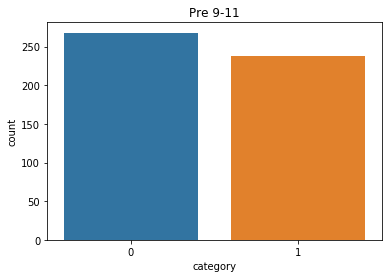

In [34]:
plot = sns.countplot(x = 'category', data = a)
plt.title("Pre 9-11")

Text(0.5, 1.0, 'Post 9-11')

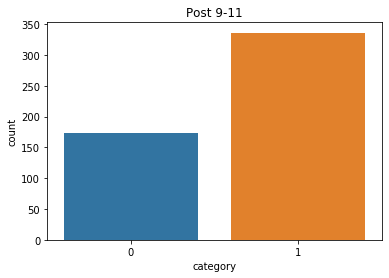

In [35]:
b = articles[articles['intervention'] == 'pre']
sns.countplot(x = 'category', data = b)
plt.title('Post 9-11')

In [42]:
#extract years
articles['year'] = articles['date'].map(lambda x: x.strftime('%Y'))
articles['month'] = articles['date'].map(lambda x: x.strftime('%m'))

In [85]:
NA_years = articles[articles['category'] == 0]
not_NA_years = articles[articles['category'] == 1]


NA_count = NA_years.groupby(['year', 'month'])
NA_count = NA_years.groupby(['year', 'month']).count().reset_index().fillna(0)
NA_count['count'] = NA_count['text']

not_NA_count = not_NA_years.groupby(['year', 'month']).count().reset_index().fillna(0)
not_NA_count['count'] = not_NA_count['text']

,year,month,text,source,group,date,intervention,expanding,distancing,assimilating,category,count
0,1996,09,3,3,3,3,3,3,3,3,3,3
1,1996,10,2,2,2,2,2,2,2,2,2,2
2,1996,11,3,3,3,3,3,3,3,3,3,3
3,1996,12,2,2,2,2,2,2,2,2,2,2
4,1997,01,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
112,2006,05,1,1,1,1,1,1,1,1,1,1
113,2006,06,6,6,6,6,6,6,6,6,6,6
114,2006,07,9,9,9,9,9,9,9,9,9,9
115,2006,08,5,5,5,5,5,5,5,5,5,5


In [89]:
not_NA_count['Non-Domestic'] = NA_count['count']
not_NA_count['Domestic'] = not_NA_count['count']
merged = not_NA_count[['year', 'month','Domestic', 'Non-Domestic']].fillna(0)
merged.set_index(['year', 'month'], inplace=True)
merged

Domestic  Non-Domestic
year month                        
1996 09            3           5.0
     10            2           6.0
     11            3           8.0
     12            2           5.0
1997 01            4           6.0
...              ...           ...
2006 05            1           0.0
     06            6           0.0
     07            9           0.0
     08            5           0.0
     09            3           0.0

[117 rows x 2 columns]

Text(0.5, 0, 'Year')

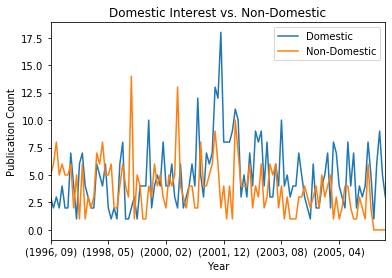

In [90]:
merged.plot()
plt.title('Domestic Interest vs. Non-Domestic')
plt.ylabel('Publication Count')
plt.xlabel("Year")